In [3]:
#pandas를 사용한 데이터셋 가져오기 (6,497개의 와인)

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
#잘 가져왔는지 처음 5개 샘플 확인

In [5]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
# 네 번째 class는 타깃값으로 0이면 레드와인, 1이면 화이트 와인

In [7]:
# 이진 분류 문제, 화이트와인이 양성임을 알 수 있다.

In [9]:
# 판다스 데이터 프레임의 유용한 메소드 2개
# info(): 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
# describe(): 열에 대한 간략한 통계를 출력 (최소, 최대, 평균값 등.) 

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [11]:
# 6,497개의 샘플이 있고 4개 열은 모두 실숫값이다. 누락된 값은 없음

In [12]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [13]:
# 평균, 표편, 최소, 최대값, 중간값, 1사분위수, 3사분위수
# 사분위수는 데이터를 순서대로 4등분한 값이다. 만약 데이터가 짝수개라 중앙값 선택이 안되면 가운데 2개의 평균을 사용

# 알코올 도수, 당도, pH 스케일이 다르다는 것을 알 수 있다.

In [14]:
# 사이킷런의 StandardScaler 클래스를 사용해서 특성을 표준화해야함
# 그전에 판다스 데이터 프레임을 넘파이 배열로 바꾸로 훈련세트, 테스트세트로 분할

In [15]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [16]:
# 훈련세트와 테스트세트로 나누어준다.

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [18]:
# 25%의 테스트 세트를 자동 지정 샘플개수가 많으므로 해당 실습에서는 20퍼로 지정 test_size=0.2

In [19]:
# 훈련세트와 테스트 세트의 크기를 확인

In [20]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [21]:
# 훈련세트가 5197, 테스트세트가 1300개이고 특성은 3개 인것을 확인

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
# StandardScaler 클래스를 사용하여 훈련세트 전처리, 같은 객체로 테스트세트를 변환

In [24]:
# 표준점수로 변환된 train_scaled, test_scaled를 사용해 로지스틱 회귀 모델 훈련

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [26]:
# 그 결과 높지 않은 결과가 나오는 것을 알 수 있다. 
# 훈련과 테스트 모두 낮은 값을 갖으므로 과소적합

# 고려사항
# 매개변수 C의 값을 변경
# solver 매개변수에서 다른 알고리즘 선택
# 다항 특성을 만들어 추가

In [27]:
#이제 해당 모델에 대한 보고서 작성을 위해 모델에서 사용한 로지스틱 회귀가 학습한 계수와 절편을 출력

In [29]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [30]:
# 해당 계수와 절편을 통해 알코올 도수, 당도가 높을 수록 화이트 와인일 가능성이 높고, pH가 높을수록 레드와인일 가능성이 높은 것을 짐작할 수 있다.
# 왜냐하면 도수 x 0.512 + 당도 x 1.673 + pH x -0.687 + 1.8177 > 0 -> 화이트와인  라고 생각할 수 있기 때문이다.
# 그러나 설명하기 어려움
# 쉬운 방법으로 설명할 수 있는 모델? 결정트리

In [31]:
# 사이킷런에서 제공하는 결정트리 알고리즘
# DevisionTreeClassifier 클래스
# 사용법은 이전과 동일하다
# fit() 훈련, score() 정확도 평가

# random_state 지정하는 이유는 원래 결정트리 알고리즘은 최적의 분할을 찾기 위해 무작위성을 사용해 여기서는 실습이 같은 결과를 얻기 위해 사용 원래는 사용x

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [33]:
# 과대적합된 모델인 것을 확인 할 수 있다.

In [34]:
# plot_tree() 함수를 사용해 결정트리를 시각화

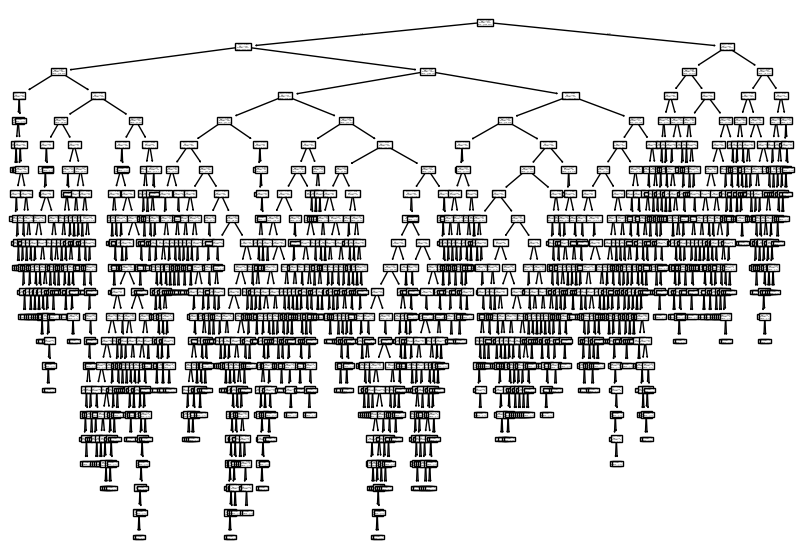

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [36]:
# 트리의 깊이를 제한하여 출력
# max_depth 매개 변수를 1로 줘 루트노드를 제외하고 하나의 노드를 더 확장하여 그린다.
# filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다.
# future_names 매개변수에서는 특성의 이름을 전달할 수 있다.

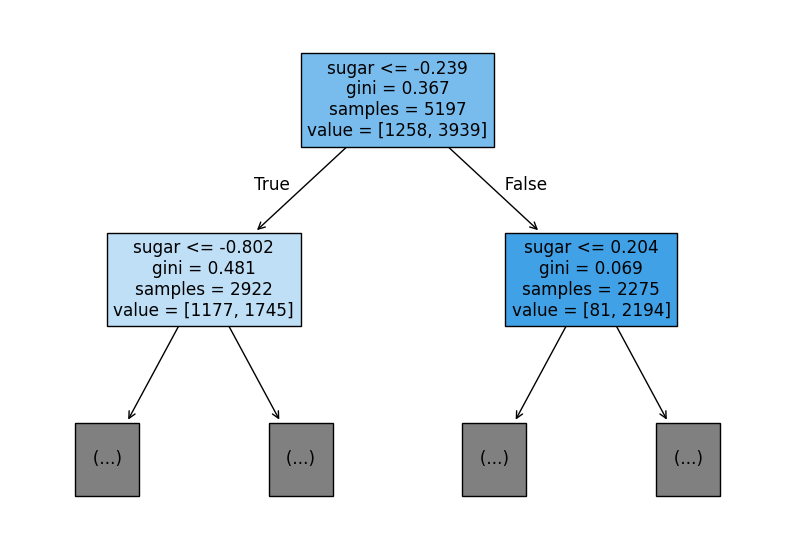

In [37]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [38]:
# 테스트 조건(sugar)
# 불순도(gini)
# 총 샘플수(samples)
# 클래스별 샘플 수(value)

# 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시
# 리프 노드에서 가장 많은 클래스가 예측 클래스가 된다

In [39]:
# gini: 지니 불순도
# criterion 매개변수의 기본값이 gini
# 노드에서 데이터를 분할할 기준을 전하는 것이 용도이다. 어떻게 당도 -0.239를 기준으로 하였는가?
# 불순도(gini, entropy)와 정보이득에 대한 자세한 설명은 노션에서... continue..

# 결국 결정트리 알고리즘은 불순도 기준을 사용해 정보이득이 최대가 되도록 노드를 분할 하는 것이다. 노드를 순수하게 나눌수록 정보이득이 커짐
# 새로운 샘플에 대해 예측할 때에는 노드의 질문에 따라 트리를 이동한다. 마지막에 도달한 노드의 클래스 비율을 보고 예측을 하는 원리

# 앞에서는 트리가 제한 없이 자라났기 때문에 과대적합이 된 것. 제한을 해야한다

In [40]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


In [41]:
# max_depth=3를 통해 최대 깊이를 3으로 지정하였다.

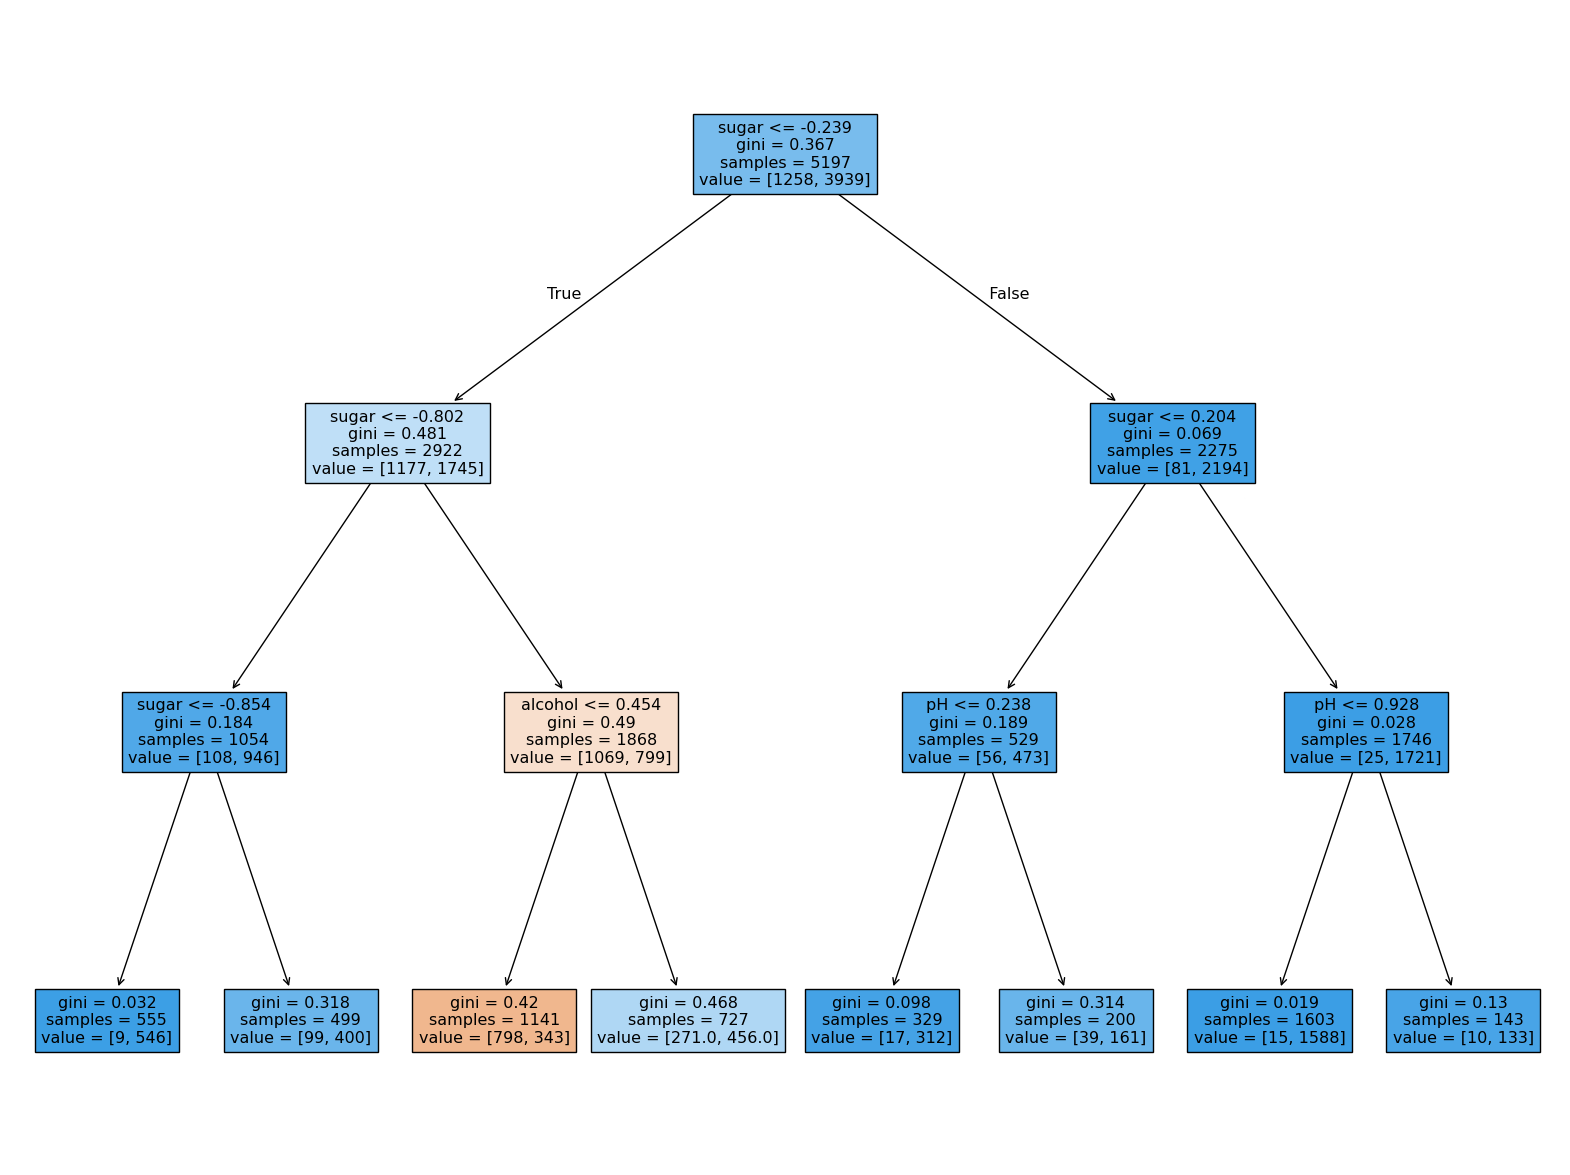

In [42]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [43]:
# 그래프로 나타내자 다음과 같다.
# 당도를 기준으로 훈련세트를 나누기도 하고 2번째 부터는 pH로 나누기도 하는 것을 알 수 있다.
# 왼쪽에서 세번째만 음성 클래스가 더 많으므로 레드 와인일것이라 예측할 수 있다.

# 즉 -0.239 >  당도 > -0.802 && 도수 <= 0.454  -> 레드와인  ; 설명하기 쉽다.

In [44]:
# 불순도를 기준으로 샘플을 나눈다. 근데 불순도는 클래스별 비율을 가지고 계산..
# 그러므로 스케일링 전처리가 필요없다.

In [45]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


In [46]:
# 전처리를 하나 안하나 같은 값이 나오는 것을 확인 할 수 있다.

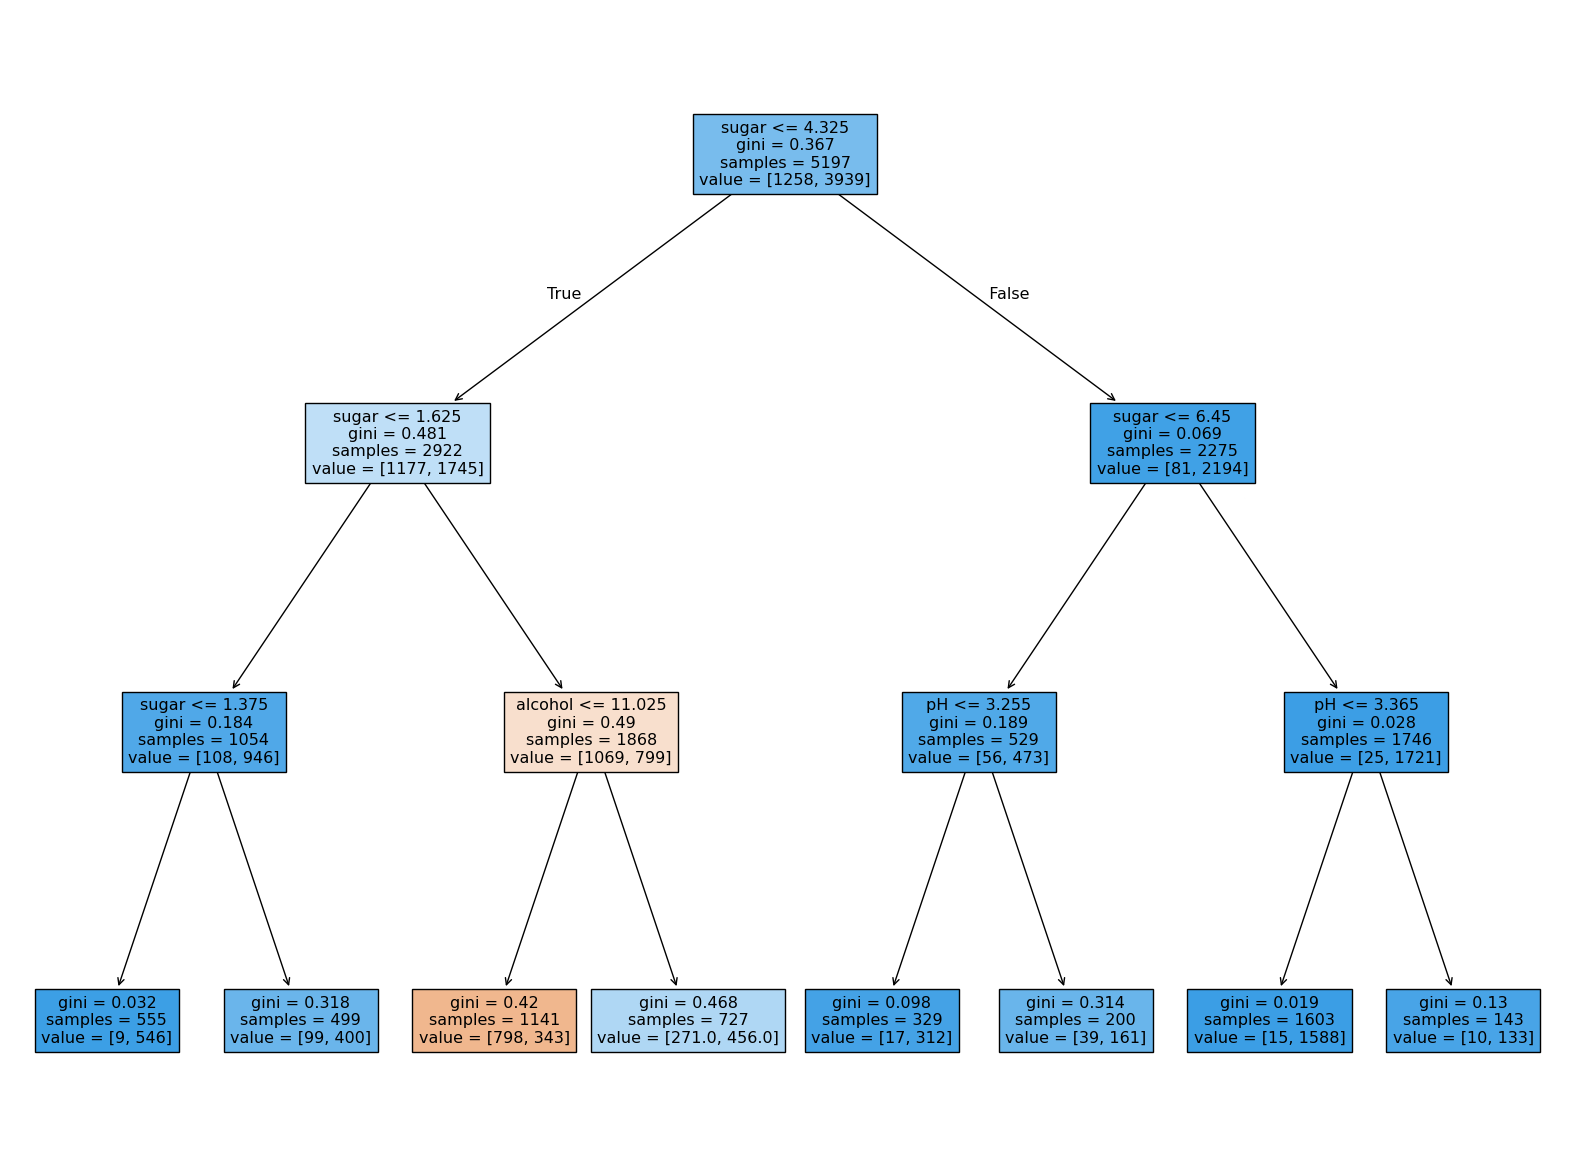

In [47]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [48]:
# 전처리를 안하니까 음수가 안나와서 가시성이 더 좋다

In [49]:
# 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산 가능
# 루트에서 당도 특성을 사용하였으므로 가장 높은 중요도를 갖을 것이라는 짐작은 가능하다.
# 특성 중요도는 feature_importances_ 속성에 저장

In [50]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [51]:
# 당도, 도수, pH 순으로 중요함을 알 수 있다. 이를 모두 더하면 1
# 각 노드의 정보이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
# 결정 트리 모델을 특성 선택에 활용할 수 있다. 어떤 특성이 중한가?

In [53]:
# min_impurity_decrease를 사용하여 가지치기
# 어떤 노드의 정보이득 x (노드의 샘플 수) /  (전체 샘플 수) 값이 이 매개변수보다 작으면 더이상 분할하지 않는다.
# 매개변수 값을 0.0005로 지정하고 결정트리 만들자. 좌우 균일? 성능은?

In [54]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


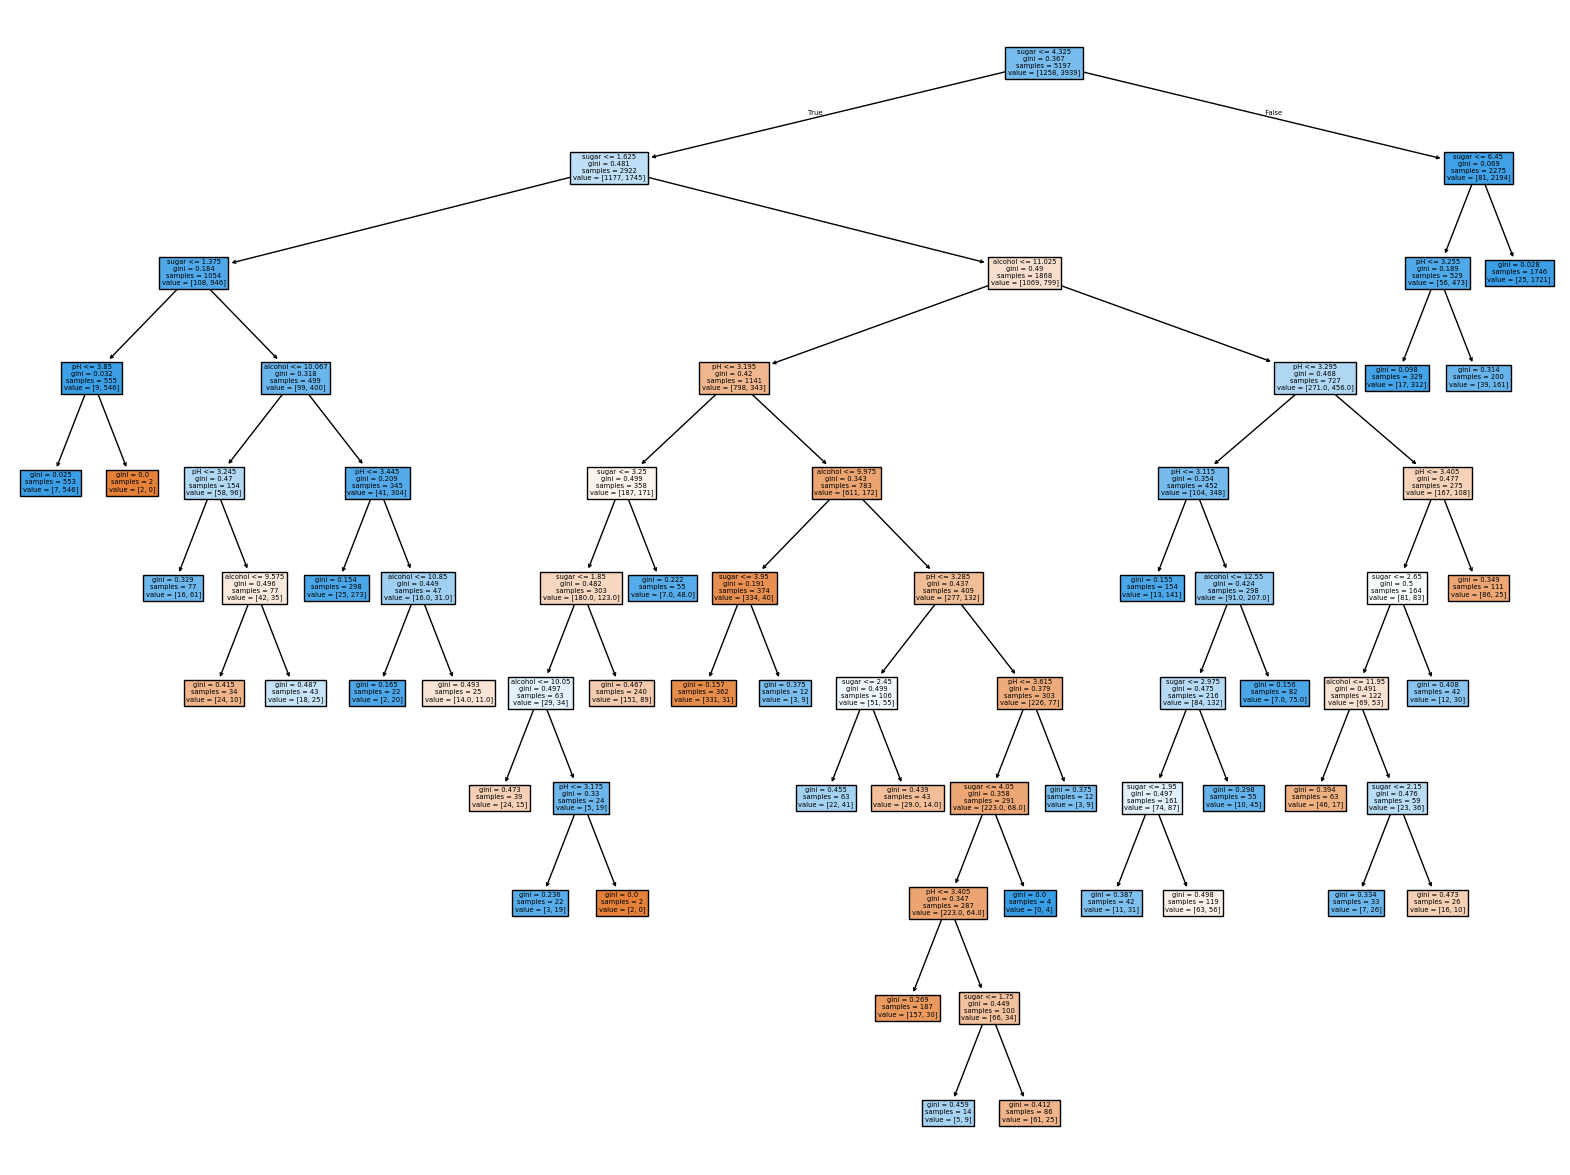

In [55]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [56]:
# 더 나은 성능을 보이는 것을 확인하였고, 좌우 불균일 하다는 것을 확인할 수 있다.

In [52]:
# 다음절에서 결정트리의 다양한 매개변수, 하이퍼파라미터를 자동으로 찾기 위한 방법
# 앙상블 학습